# TMDB Analysis: Comparative Study of Comedy vs Horror Genres


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This study is aimed at making a comparative study of Comedy vs Horror genre films, on parameters of popularity, revenue, budget and count of films. The study is particularly focused on the trends of the parameters over period of time.
Some of the questions of interest are:<br/>
<ul>
    <li>Which genre was more popular in each time frame (A time interval of  years is considered)?</li>
    <li>Which genre of films were more produced during those time frames?</li>
    <li>Budget vs popularity relation of all the movies in the dataset</li>
</ul>



<a id='wrangling'></a>
## Data Wrangling
The below cells focus on loading data and analyzing the existing dataset for any abnormalities and inconsistencies. Once identified, attempts are made to rectify those so that they do not affect the results.


The below cells imports all the libraries and loads csv that will be used while investigating data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# Loading the csv file as pandas dataframe
movies_df=pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Observations from above data:<br/>
-There are 10866 movies in the dataset.<br/>
-The budgets and revenues are are in exponential format which needs to be changed.<br/>
-There are some 0 values in budget and revenue which needs to be addressed before doing any calculations

### Data Cleaning

The above dataframe shows that the budget and revenue adjusted are displayed in scientific notations. For proper visualization, the float is formatted to display upto two decimals and to suppress the sceintific notation.

In [2]:
# Sets floating point to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

There are a number of rows with budget adjusted to inflation as 0. These rows must be eliminated before doing analysis. If 0 values are considered then it will affect the r squared value that will show the change in popularity with budget.

In [3]:

#removes the rows containing 0 in columns of budget_adj and revenue_adj
valid_budget_df = movies_df[ movies_df.budget_adj!=0.00] 
valid_budget_and_revenue_df = valid_budget_df[ valid_budget_df.revenue_adj!=0.00] 
valid_budget_and_revenue_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


Since time interval considered is 5 years each, first we must categorize the data into groups of 5 years for further study. <br/>
Before proceeding further, first we need to know the upper and lower limits of the release year and determine if any invalid data or any data is missing in the release_year column.

In [4]:
# finding the minimum and max values to determine the start and end intervals
print ("Max release year "+str(movies_df['release_year'].max()) )
print ("Min release year "+str(movies_df['release_year'].min()) )

# checking if any release year is null/None or 0 or NA.
print ("Rows with invalid release years are below")
movies_df[movies_df['release_year']<=0 & movies_df.release_year.isnull()]

Max release year 2015
Min release year 1960
Rows with invalid release years are below


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


No rows with invalid release year is present in the dataset.<br>
Below cell defines a function to group movies based on release year.

In [5]:
def group_release_year(releaseYear):
    ''' This function takes input the release year as int.
        Return Value is a string denoting the time interval.
        The years are divided into groups of 5 years each'''
    
    if(releaseYear>=1960 and releaseYear<1965):
        return "1960-1964"
    elif(releaseYear>=1965 and releaseYear<1970):
        return "1965-1969"
    elif(releaseYear>=1970 and releaseYear<1975):
        return "1970-1974"
    elif(releaseYear>=1975 and releaseYear<1980):
        return "1975-1979"
    elif(releaseYear>=1980 and releaseYear<1985):
        return "1980-1984"
    elif(releaseYear>=1985 and releaseYear<1990):
        return "1985-1989"
    elif(releaseYear>=1990 and releaseYear<1995):
        return "1990-1994"
    elif(releaseYear>=1995 and releaseYear<2000):
        return "1995-1999"
    elif(releaseYear>=2000 and releaseYear<2005):
        return "2000-2004"
    elif(releaseYear>=2005 and releaseYear<2010):
        return "2005-2009"
    elif(releaseYear>=2010 and releaseYear<=2015):
        return "2010-2015"

The above function takes a single reult and returns value. To apply to on all the rows and create a new column for each row the apply function of pandas is used below

In [6]:
# using pandas inbuilt apply, to apply the above function on release year column. A new column year group is created.
movies_df['year_group']=movies_df.release_year.apply(group_release_year)
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year_group
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,2010-2015
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,2010-2015
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,2010-2015
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,2010-2015
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,2010-2015


Now that the release years have been grouped, two subsets are to be created. One will be containing Comedy films and Other will be Horror.
This filtering is nessacry to islotae the movies based on genres for separate study of parameters like count and popularity.
In order to do that making genre column in smaller case for easier comparison.

In [7]:
movies_df['genres'] = movies_df['genres'].map(lambda x: x if type(x)!=str else x.lower())
comedies_df=movies_df[pd.notnull(movies_df['genres']) & movies_df['genres'].str.contains('comedy')]
horror_df=movies_df[pd.notnull(movies_df['genres']) & movies_df['genres'].str.contains('horror')]

In [8]:
comedies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year_group
8,211672,tt2293640,7.40,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,91,family|animation|adventure|comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50,2015,68079970.04,1064192016.80,2010-2015
9,150540,tt2096673,6.33,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,94,comedy|animation|family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.00,2015,160999929.16,785411574.70,2010-2015
13,257344,tt2120120,5.98,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,http://www.pixels-movie.com/,Chris Columbus,Game On.,...,105,action|comedy|science fiction,Columbia Pictures|Happy Madison Productions,7/16/15,1575,5.80,2015,80959964.38,224146025.10,2010-2015
24,318846,tt1596363,4.65,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,http://www.thebigshortmovie.com/,Adam McKay,This is a true story.,...,130,comedy|drama,Paramount Pictures|Plan B Entertainment|Regenc...,12/11/15,1545,7.30,2015,25759988.67,122678731.54,2010-2015
26,214756,tt2637276,4.56,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,115,comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.30,2015,62559972.47,198594430.14,2010-2015


In [9]:
horror_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year_group
34,257445,tt1051904,3.64,58000000,150170815,Goosebumps,Jack Black|Dylan Minnette|Odeya Rush|Amy Ryan|...,http://www.goosebumps-movie.com/,Rob Letterman,The stories are alive.,...,103,adventure|horror|comedy,Columbia Pictures|Original Film|Scholastic Ent...,8/5/15,600,6.20,2015,53359976.52,138157089.01,2010-2015
62,310131,tt4263482,2.46,3500000,40423945,The Witch,Anya Taylor-Joy|Ralph Ineson|Kate Dickie|Harve...,http://a24films.com/films/witch/,Robert Eggers,Evil takes many forms.,...,92,mystery|horror,Parts and Labor|RT Features|Rooks Nest Enterta...,3/24/15,700,5.80,2015,3219998.58,37190013.04,2010-2015
79,263472,tt3605418,2.08,2500000,5214043,Knock Knock,Keanu Reeves|Lorenza Izzo|Ana de Armas|Aaron B...,http://knockknockmovie.tumblr.com/,Eli Roth,One night can cost you everything.,...,99,drama|horror|thriller,Universum Film (UFA)|Dragonfly Entertainment|B...,6/26/15,473,4.80,2015,2299998.99,4796917.45,2010-2015
86,243688,tt1029360,1.98,35000000,95437994,Poltergeist,Sam Rockwell|Rosemarie DeWitt|Saxon Sharbino|K...,NaN,Gil Kenan,They're Here. And They Know What Scares You.,...,93,horror|thriller,Ghost House Pictures|Vertigo Entertainment|Met...,5/20/15,589,5.00,2015,32199985.83,87802915.85,2010-2015
87,287424,tt1881002,1.98,4000000,187112,Maggie,Arnold Schwarzenegger|Abigail Breslin|Joely Ri...,http://www.maggiethefilm.com/,Henry Hobson,Don't Get Bitten,...,95,horror,Lionsgate|Grindstone Entertainment Group|Silve...,5/8/15,384,5.10,2015,3679998.38,172142.96,2010-2015


<a id='eda'></a>
## Exploratory Data Analysis


### Which genre of films were more produced during the selected time frames of 5 years each?

The count of movies produced in each year group is calculated. The agregate function count is used to find total of each column. 
Since we are interested in only the number of movies produced, the graph is plotted on the basis of id column, which contains the unique id of each movie. Number of id's gives the number of movies

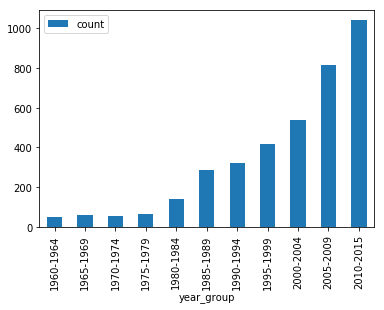

In [10]:
comedies_group=comedies_df.groupby('year_group').agg(['count'])
horror_group=horror_df.groupby('year_group').agg(['count'])
comedies_group['id'].plot.bar()


The abpve plot shows number of movies of type comedy produced in each year group

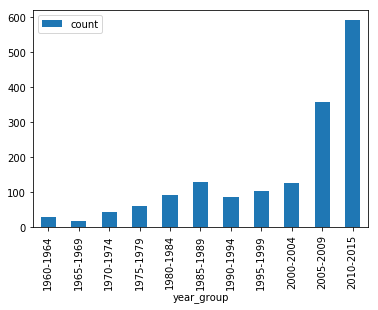

In [11]:
horror_group['id'].plot.bar()

The above plot shows number of movies of type horror produced in each year group

A dataframe is created which contains only the id count of both genres. This dataframe was created for easier creation of the bar graph to do a comparative study

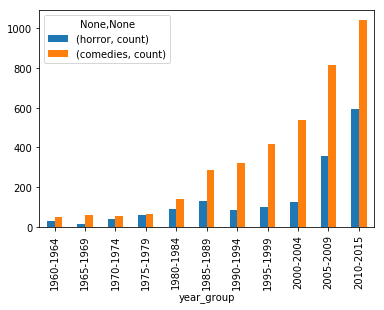

In [12]:
combined_df_id=pd.concat([horror_group['id'], comedies_group['id']], axis=1, keys=['horror', 'comedies'])
combined_df_id.plot(kind='bar')

the above graph is the combined bar graph of number of movies produced of each genre under consideration

From above graphs it shows that in each time period the number of comedies movies are always produced in greater number when compared to horror movies

### Which genre was more popular in each time frame (A time interval of 5 years is considered)?

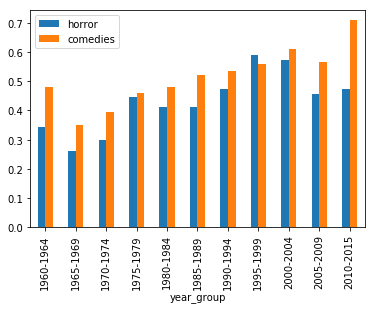

In [13]:
comedies_group_mean=comedies_df.groupby('year_group').mean()
horror_group_mean=horror_df.groupby('year_group').mean()
combined_df_popularity=pd.concat([horror_group_mean['popularity'], comedies_group_mean['popularity']], axis=1, keys=['horror', 'comedies'])
combined_df_popularity.plot(kind='bar')

The above graph shows the average popularty comparison between the behres under consideration over each period of time

From above graphs it shows that in each time period, comedies are almost always more  popular compared to horror movies. 
The only exception is from the year 1995-1999 where horror films are slightly more popular 

### Relationship  between popularity and budget adjusted to inflation

To undestand the relation between popularity and budget of the movie we need to find the r squared value between the two. Before we do that it is better to take a look on the scatter plot that is created from these two columns to get an idea if there is a linear relation between the two.<br/>
The budget adjusted to inflation is the independent variable while popularity is consoidered as the dependent variable. We are interested in knowing if budget has a significance influence over the popularity.

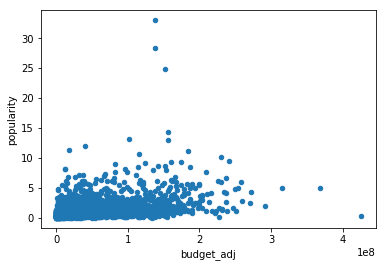

In [14]:
valid_budget_and_revenue_df.plot(kind="scatter",x="budget_adj",y="popularity")

The above plot shows that there is no strong relationship between budget and popularty. To solidify this conclusion let us calculate the r squared value.

Calculating r value for the above scatter plot to find the relation between budget_adj and popularity 

In [15]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(valid_budget_and_revenue_df['budget_adj'], valid_budget_and_revenue_df['popularity'])

In [16]:
r_value**2

0.15950072512249258

The r squared value is low which confirms the relation between budget and popularity

<a id='conclusions'></a>
## Conclusions

From the above analysis the following conclusions are drawn about the above questions.
<ul>
    <li> Comedy genre movies are produced more in number in all the year groups compared to horror movies. It is eveident from the graph</li>
    <li> Comedy movies are more popular when compared to horror movies in general, over period of time. The mean of the popularity is considered of each year group</li>
    <li> The r squared value between budget adjusted and popularity is very small. This implies there is little variation in popularity with respect to budget of the movies</li>
    </ul>